# Будуємо просту лінійну регресію на датасеті


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import roc_auc_score
from sklearn.decomposition import PCA
import time
from sklearn.metrics import mean_squared_error as mse

In [15]:
# Dataset Link - https://www.kaggle.com/datasets/dhanushnarayananr/credit-card-frauddf = pd.read_csv("./card_transdata.csv")
y = np.array(df["fraud"])
X = np.array(df.iloc[:, :-1])

In [16]:
# X = torch.from_numpy(X).type(torch.float)
# y = torch.from_numpy(y).type(torch.float)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

lr = LinearRegression()
st = time.time()
lr.fit(X_train, y_train)
fn = time.time()

In [17]:
y_pred = lr.predict(X_test)
print(f"MSE: {mse(y_test, y_pred)}")
print(f"Accuracy: {roc_auc_score(y_test, y_pred)}")
print(f"Time: {(fn-st):.4f}")

MSE: 0.055338644427102755
Accuracy: 0.9733966958874949
Time: 0.0919


# Результат

Як бачимо звичайна лінійна регресія на датасеті по визначенню шахрайства з кредитними картками спрацьовую дуже швидко з високою точністю.

**Побудуємо explained varience та визначемо які з данних ми можемо не враховувати, зберігаючи точність нашої моделі**

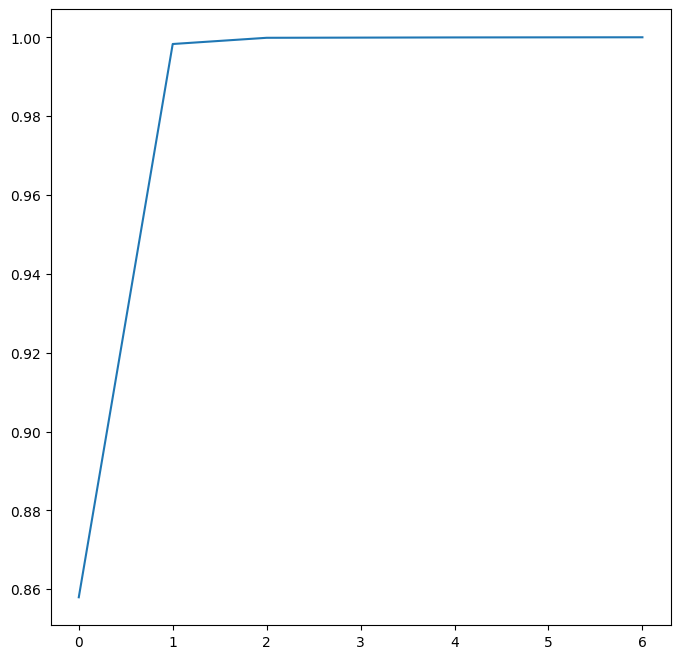

In [18]:
pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(8,8))
plt.plot(cumsum)
plt.savefig("evr.png")

In [19]:
pca = PCA(n_components=3)
x_train_pca = pca.fit_transform(X_train)
lr = LinearRegression()
st = time.time()
lr.fit(x_train_pca, y_train)
fn = time.time()
y_pred = lr.predict(pca.transform(X_test))
print(f"MSE: {mse(y_test, y_pred)}")
print(f"Accuracy: {roc_auc_score(y_test, y_pred)}")
print(f"Time: {(fn-st):.4f}")

MSE: 0.05946547006225252
Accuracy: 0.9507794655046748
Time: 0.0760


# Результат

За графіком бачимо, що лише з одним компонентом ми вже отримуємо майже 100% інформації про наш датасет.

На практиці ж, беручи лише один компонент, модель видає дуже низькі результати.

Починаючи з трьох компонентів, модель має точність більше ніж 95% (що на 2% нижче від початкового експеременту) і спрацьовує на 20% швидше ніж при першому тесті.

Хоча точність моделі зменшилась, а mse збільшилось (на 0.004), ця різниця не має вагомого значення у великих масштабах даних. 